# Análisis de Componentes Principales

El algoritmo de Análisis de Componente Principales, en inglés *Principal Component Analysis (PCA)* es una técnica de aprendizaje no supervisado (i.e. el conjunto de datos no está etiquetado) que busca reducir la dimensionalidad de un conjunto de datos. Expliquemos su funcionamiento de forma gráfica.

Observa los siguientes conjuntos de datos:

In [53]:
import matplotlib.pyplot as plt
import numpy as np

Text(446.36136363636354, 0.5, 'x2')

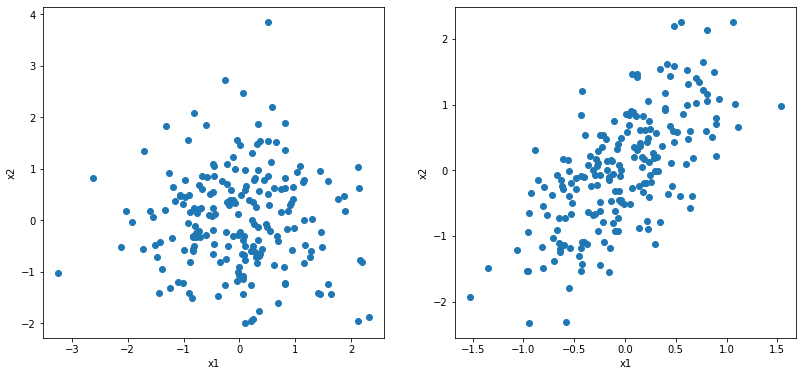

In [54]:
rng = np.random.RandomState(42)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.tight_layout(pad=4.0)

X = rng.randn(200, 2)
axs[0].scatter(X[:,0], X[:,1])
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')

X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
axs[1].scatter(X[:,0], X[:,1])
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')

¿Qué observamos? ¿Son iguales ambos conjuntos de datos? ¿Cuántas características (dimensiones) definen cada uno de los conjuntos de datos?

Efectivamente, el conjunto de datos de la izquierda dispone de dos características, `x1` y `x2`, que no presentan ningún tipo de relación entre ellas. Por contra, el conjunto de datos de la derecha, dispone de las mismas características pero, en este caso, existe cierta correlación entre `x1` y `x2`.

Este hecho que observamos gráficamente puede demostrarse mediante la extracción de las **componentes principales** de cada conjunto de datos como se observa en las siguientes imágenes:



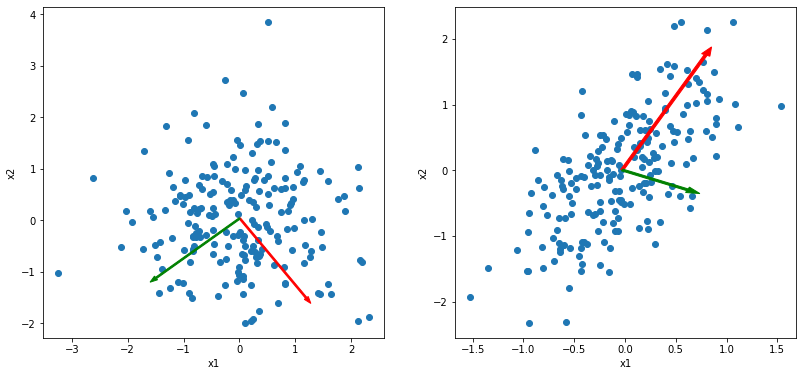

In [55]:
from sklearn.decomposition import PCA

rng = np.random.RandomState(42)

scale = 2
width = 0.03

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.tight_layout(pad=4.0)

# left dataset

X = rng.randn(200, 2)
pca = PCA(n_components=2, random_state=42).fit(X)

axs[0].scatter(X[:,0], X[:,1])
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')

origin = pca.mean_

pc1 = scale * np.sqrt(pca.explained_variance_)[0] * pca.components_[0] 
pc2 = scale * np.sqrt(pca.explained_variance_)[1] * pca.components_[1] 

axs[0].arrow(*origin, *pc1, color='r', width=width)
axs[0].arrow(*origin, *pc2, color='g', width=width)

# right dataset

X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, random_state=42).fit(X)

axs[1].scatter(X[:,0], X[:,1])
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')

origin = pca.mean_

pc1 = scale * np.sqrt(pca.explained_variance_)[0] * pca.components_[0] 
pc2 = scale * np.sqrt(pca.explained_variance_)[1] * pca.components_[1] 

axs[1].arrow(*origin, *pc1, color='r', width=width)
axs[1].arrow(*origin, *pc2, color='g', width=width)

Las componentes principales describen la varianza de los datos: su dirección indica hacia dónde varía la varianza y su magnitud denota la magnitud de dicha varianza. Es por ello que en el conjunto de datos izquierdo de la figura anterior ambas componentes principales tienen diferente sentido (los datos dependen de dos características) y similar magnitud (ambas características son igualmente relevantes para describir los datos), mientras que en el conjunto de datos derecho ambas componentes principales tienen diferente sentido (los datos dependen de dos características) pero diferente magnitud (la componente principal roja contiene mucha más varianza que la verde).

El objetivo de PCA es encontrar estas componentes principales y reducir la dimensionalidad del conjunto de datos eliminando aquellas con escasa magnitud. Observemos el resultado de aplicar PCA a los conjuntos de datos anteriores:

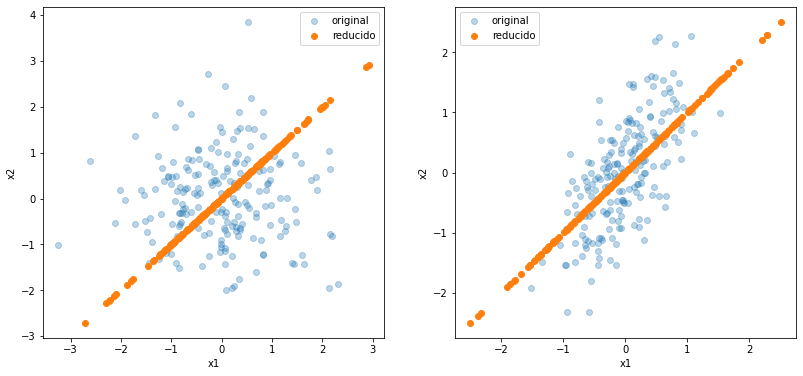

In [56]:
from sklearn.decomposition import PCA

rng = np.random.RandomState(42)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.tight_layout(pad=4.0)

# left dataset

X = rng.randn(200, 2)
X_trans = PCA(n_components=1, random_state=42).fit_transform(X)

axs[0].scatter(X[:,0], X[:,1], alpha=0.3, label='original')
axs[0].scatter(X_trans[:,0], X_trans[:,0], label='reducido')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].legend()

# right dataset

X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
X_trans = PCA(n_components=1, random_state=42).fit_transform(X)

axs[1].scatter(X[:,0], X[:,1], alpha=0.3, label='original')
axs[1].scatter(X_trans[:,0], X_trans[:,0], label='reducido')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].legend()

Como vemos, en ambos casos, la información del conjunto de datos se ha condensado para pasar a una única dimensión. En el conjunto de datos de la izquierda esta compresión es excesiva, puesto que muestras muy distantes en el conjunto original se han acercado en exceso en el conjunto de datos reducido. Sin embargo, en el conjunto de datos de la derecha, la compresión es adecuada, al representar el conjunto de datos reducido prácticamente la misma información que el conjunto de datos original.

Como dijimos, la magnitud de las componentes principales denota la cantidad de varianza explicada por cada componente principal. PCA nos permite recuperar el ratio de varianza explicada por cada componente principal (atributo `explained_variance_ratio`) para justificar si debemos o no eliminar una dimensión. Observemos la varianza explicada por cada componente principal del ejemplo anterior:

([<matplotlib.patches.Wedge at 0x7f14eb7c5f98>,
 [Text(-1.0241462577811433, 0.4014030925053772, 'Componente Principal 1'),
  Text(1.0241462765721767, -0.40140304456163095, 'Componente Principal 2')],
 [Text(-0.5586252315169872, 0.21894714136656937, '88.1%'),
  Text(0.5586252417666419, -0.21894711521543503, '11.9%')])

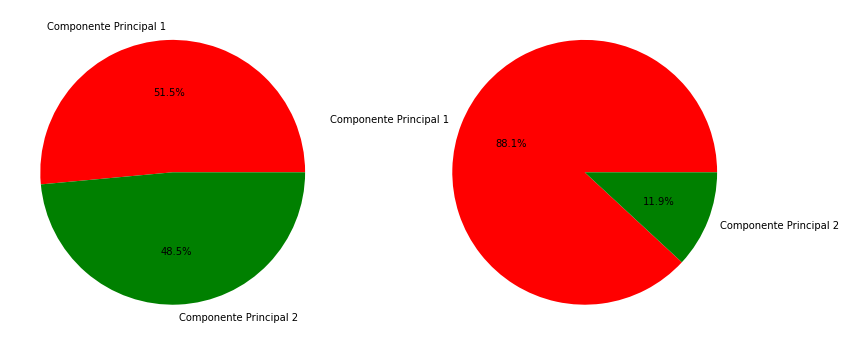

In [57]:
from sklearn.decomposition import PCA

rng = np.random.RandomState(42)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.tight_layout(pad=4.0)

# left dataset

X = rng.randn(200, 2)
pca = PCA(n_components=2, random_state=42).fit(X)

axs[0].pie(pca.explained_variance_ratio_, labels=['Componente Principal 1', 'Componente Principal 2'], colors=['r', 'g'], autopct='%1.1f%%')



# right dataset

X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, random_state=42).fit(X)

axs[1].pie(pca.explained_variance_ratio_, labels=['Componente Principal 1', 'Componente Principal 2'], colors=['r', 'g'], autopct='%1.1f%%')

Estos gráficos demuestran por qué el conjunto de datos de la izquierda no puede reducirse a una dimensión mientras que el de la derecha sí.

La cantidad de varianza explicada por las componentes principales permite determinar el número de dimensiones a las que debe reducirse un conjunto de datos. Nuestro objetivo será seleccionar suficientes dimensiones de tal forma que éstas expliquen una varianza superior a un umbra (habitualmente el 90%). El número ideal de componentes principales podemos extraerlo fácilmente analizando la varianza acumulada por cada componente principal. En el ejemplo visto hasta ahora no tiene sentido, ya que el conjunto de datos parte de dos dimensiones, pero si aplicamos PCA al conjunto de datos de [`boston houses-prices`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) que dispone de 13 dimensiones obtenemos la siguiente curva de varianza explicada:

Text(0, 0.5, 'Varianza explicada')

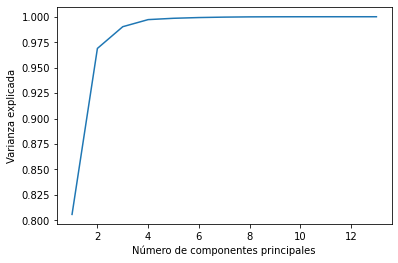

In [58]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

pca = PCA(n_components=13).fit(X)

plt.figure(figsize=(6,4))

xx = np.arange(1, 14, step=1)
yy = np.cumsum(pca.explained_variance_ratio_)

plt.plot(xx, yy)
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')

Observamos que, con únicamente 2 componentes principales, somos capaces de explicar más del 95% de la varianza.

## Cálculo de las componentes principales

Una vez entendido cómo funciona PCA, vamos a determinar cómo podemos calcular las componentes principales. Para ello vamos a hacer uso de la descomposición de valores sigulares, en inglés *Singular Value Decomposition (SVD)*. Supongamos que tenemos un conjunto de datos $M$ con $n$ características y $m$ muestras. SVD descompondrá la matriz $M$ de tal modo que $M = U \Sigma V^t$:

<img src="https://imgur.com/download/TEfmfuS/">

$\Sigma$ contiene los valores singulares ($\sigma_1, \sigma_2, \dots, \sigma_m$) como elementos diagonales ordenados de mayor a menor ($\sigma_1 > \sigma_2 > \dots > \sigma_m$):

$\Sigma =
 \begin{pmatrix}
  \sigma_1 & 0        & \cdots & 0        \\
  0        & \sigma_2 & \cdots & 0        \\
  \vdots   & \vdots   & \ddots & \vdots   \\
  0        & 0        & \cdots & \sigma_n \\
  \vdots   & \vdots   & \vdots & \vdots   \\
  0        & 0        & 0      & 0   
 \end{pmatrix}$

Las columnas de $U$ son los *vectores sigulares izquierdos* y las columnas de $V$ son los *vectores sigulares derechos*:

$U =
 \begin{pmatrix}
  \uparrow   & \uparrow   & \cdots & \uparrow   \\
  u_1        & u_2        & \cdots & u_m        \\
  \downarrow & \downarrow & \cdots & \downarrow 
 \end{pmatrix}$

$V =
 \begin{pmatrix}
  \uparrow   & \uparrow   & \cdots & \uparrow   \\
  v_1        & v_2        & \cdots & v_n        \\
  \downarrow & \downarrow & \cdots & \downarrow 
 \end{pmatrix}$

Se verifica la ortogonalidad de los vectores singulares de $U$ y $V$, por lo que $U\cdot U^t = I$ y $V \cdot V^t = I$.

Tras realiza la descomposición, [proceso que puede realizarse de manera analítica](https://es.wikipedia.org/wiki/Descomposici%C3%B3n_en_valores_singulares), las **columnas de la matriz $V$ se corresponden con las componentes principales** y **los cuadrados de los elementos diagonales de $\Sigma$ contienen la varianza explicada por cada componente principal**.

Es importante destacar que PCA requiere **estandarizar el conjunto de datos de entrada** como paso previo para su funcionamiento. Es decir, la columnas de la matriz $M$ deberá tener media 0 y desviación típica 1.

---

Creado por **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">